# Install and import

In [ ]:
!pip install Pillow 
#!pip install scipy==1.1.0 
#from scipy import misc
from imageio import imread
from imageio import imwrite
from PIL import Image

import cv2
import os

import os
from datetime import datetime
import random as rand
from datetime import datetime
import os 
from tqdm.notebook import tqdm# progress bar
import sys
from sys import exit
from time import time 
 
delimiter = ', ' 
rand.seed(42)
dash = '-'*80

## google drive mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#!ls "/content/drive/My Drive/02830-Project_Digital_Media_Engineering/23092020-309"
!ls "/content/drive/My Drive/02830-Project_Digital_Media_Engineering/MODEL_RETRAINING/DATA_TEST/all/fire_estinguisher_augmetation"

focus.jpg  landscape.JPG


## import my packages

In [ ]:
import sys
sys.path.append('/content/drive/My Drive/')
os.chdir('/content/drive/My Drive/')
import utilities_pkg
from utilities_pkg.random_projection import random_images_projections
from utilities_pkg.specific_projections import specific_projections
from utilities_pkg.functions_advanced import createFolderInDrive
from utilities_pkg.split_images import *
from utilities_pkg.flip_image import *
from utilities_pkg.zoom import *
from utilities_pkg.color_check import *

In [ ]:
"""
from utilities_pkg.split_images import *
------------------------------------------
splitv_save(PATHin, PATHout, start = 0, l = 10, extension_out = ".jpg",n = 2, saveintermediate = False)
splith_save(PATHin, PATHout, start = 0, l = 10, extension_out = ".jpg",n = 2, saveintermediate = False)
split_one(file, PATHtoIMG, PATHout,type_split = 'v', start = 0, l = 10, extension_out = ".jpg",n = 2, saveintermediate = False)
return_images_names_from_folder(reading_from_folder)
create_dir(path)


from utilities_pkg.functions_advanced
----------------------------------------------------------
oad_images_from_folder(folder)

input form is every image in the folder PATH
if saveintermediate is True, also intermediate pictures are saved in PATHout
output form: two images
"""

'\nfrom utilities_pkg.split_images import *\n------------------------------------------\nsplitv_save(PATHin, PATHout, start = 0, l = 10, extension_out = ".jpg",n = 2, saveintermediate = False)\nsplith_save(PATHin, PATHout, start = 0, l = 10, extension_out = ".jpg",n = 2, saveintermediate = False)\nsplit_one(file, PATHtoIMG, PATHout,type_split = \'v\', start = 0, l = 10, extension_out = ".jpg",n = 2, saveintermediate = False)\nreturn_images_names_from_folder(reading_from_folder)\ncreate_dir(path)\n\n\nfrom utilities_pkg.functions_advanced\n----------------------------------------------------------\noad_images_from_folder(folder)\n\ninput form is every image in the folder PATH\nif saveintermediate is True, also intermediate pictures are saved in PATHout\noutput form: two images\n'

In [ ]:
# refresh if you changed the package!

### reload mypackage

In [ ]:
import importlib
importlib.reload(utilities_pkg.random_projection)
importlib.reload(utilities_pkg.split_images)
importlib.reload(utilities_pkg.flip_image)
importlib.reload(utilities_pkg.zoom)

<module 'utilities_pkg.zoom' from '/content/drive/My Drive/utilities_pkg/zoom.py'>

## Check directories

In [ ]:
cwd = os.getcwd()  # Get the current working directory (cwd)
files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

Files in '/content/drive/My Drive': ['Documents (old stuff)', 'Pictures', 'Colab Notebooks', 'Google', 'Booklet.docx', 'Model Outputs', '02582-ComputationalDataAnalysis', 'VIT', 'Documents', '02285- AI and Multi Agent Systems', '42634- X tech Entrepreneurship', 'pictures_presentation', 'presentazioni', 'DeepMinds.zip (Unzipped Files)', 'DeepMinds-v2.zip (Unzipped Files)', '02443-Stochastic Simulation', 'notebooks_to_pdfs', 'utilities_pkg', 'books_pdf', 'trip_luft.PNG', 'bleah_interview', '02249-ComputationallyHardProblems', '02830-Project_Digital_Media_Engineering', '02805 - Social Graphs and interactions', 'Agreement_360-Indoor.pdf']


In [ ]:
#os.chdir('/content/drive/My Drive/02830-Project_Digital_Media_Engineering/MODEL_RETRAINING/DATA_TEST')

## save and load folders

In [ ]:
#NOTE: WRITE THE COMPLETE PATH!

#reading_from_folder = "/content/drive/My Drive/02830-Project_Digital_Media_Engineering/test"
#saving_to_folder = "/content/drive/My Drive/02830-Project_Digital_Media_Engineering/test/test_split"
#create_dir(saving_to_folder)

reading_from_folder = "/content/drive/My Drive/02830-Project_Digital_Media_Engineering/MODEL_RETRAINING/DATA_TEST/all/fire_estinguisher_augmetation"
saving_to_folder = "/content/drive/My Drive/02830-Project_Digital_Media_Engineering/MODEL_RETRAINING/DATA_TEST/all/fire_estinguisher_deformed"
create_dir(saving_to_folder)

Successfully created the directory /content/drive/My Drive/02830-Project_Digital_Media_Engineering/MODEL_RETRAINING/DATA_TEST/all/fire_estinguisher_deformed 


## Check num files in dir
how many files are as input and check how many are already in the output

In [ ]:
files_alreadyinfolder = len(os.listdir(saving_to_folder))
print ("files already elaborated :%s " %files_alreadyinfolder)
files_tobeconverted =len(os.listdir(reading_from_folder))
print ("total files ready for conversion: %s" %files_tobeconverted)
#files_tobeconverted = 10

files already elaborated :0 
total files ready for conversion: 2


In [ ]:
#reading_from_folder = "/content/drive/My Drive/02830-Project_Digital_Media_Engineering/test"
#saving_to_folder = "/content/drive/My Drive/02830-Project_Digital_Media_Engineering/test/test_split"

#create_dir(saving_to_folder)

## create list of projections angles

In [ ]:
# defining a set of nice deformations for zoomed in objects:
subj_central_big = []

subj_central_big.append([-4.539248442654444, -2.5759716398481234, -4.114112409626298])
subj_central_big.append([-3.469897939235639, -0.5856506839860072, -6.234535479192091])
subj_central_big.append([-5.828739860808556, -2.752764611397662, -4.387234323718151])
subj_central_big.append([-2.1863037963812366, -2.0942384018361357, -4.210573020872204])
subj_central_big.append([-5.389295976217976, -2.0722175332533546, -4.358480236349985])
subj_central_big.append([-4.751777203526069, -2.9562438596705634, -4.093554851497812])
subj_central_big.append([-3.1026068669445546, -0.5054310619360042, -0.25045269351513394])
subj_central_big.append([-5.193876756770077, -0.44868123772054275, -1.0425236313579127])
subj_central_big.append([-4.417001096144499, -2.852762959079993, -4.3189668301684465])
subj_central_big.append([-3.9768846852613216, -2.1060499215300195, -5.142306287427782])
subj_central_big.append([-4.811749289213016, -3.2754233245962454, -3.937976570541699])
subj_central_big.append([-0.8694298702130738, -1.453058731544753, -4.3602152645574375])
subj_central_big.append([-1.5850687819147418, -0.5146320382543838, -0.12178878439747151])
subj_central_big.append([-0.12805142538717768, -0.957446516108554, -0.7930697747874964])
subj_central_big.append([-5.414048220012025, -1.5623538238250796, -1.195117818809974])
subj_central_big.append([-1.477829657261261, -0.753269811280082, -5.593840171306459])
subj_central_big.append([-3.4545178604819693, -1.6653999165267308, -5.481658465244894])


In [ ]:
subj_central_big[1][2]

-6.234535479192091

In [ ]:
# defining a set of nice deformations for objects in landscapes:
subj_central_landscape = []
subj_central_landscape.append([-1.886980463043862, -1.9432928453254115, -2.5660083229925985])
subj_central_landscape.append([-0.14868802841887094, -1.2134702483993627, -2.062530668671532])
subj_central_landscape.append([-5.555182165724589, -2.5533444449631473, -3.8997312813108524])
subj_central_landscape.append([-1.4997080705060466, -2.4867958173484412, -4.220354139878272])
subj_central_landscape.append([-4.917442909134965, -2.181545596783476, -2.6915784386753288])
subj_central_landscape.append([-0.6316241653440035, -1.2196767145271186, -1.4293188704243196])
subj_central_landscape.append([-3.954924017588063, -0.33683574792634313, -0.9374360706315553])
subj_central_landscape.append([-4.9683711638591666, -1.418034103626451, -3.283420074665773])
subj_central_landscape.append([-1.3055699168801533, -1.3259104065875478, -4.149592368052988])
subj_central_landscape.append([-0.016812060944539957, -2.83059825768392, -3.7310257764139902])

In [ ]:
len(subj_central_landscape)

10

# Test with image test

small object image
original--> deform --> zoom --> flip

landscape
original--> split --> deform-->zoom-->flip

In [ ]:
reading_from_folder = "/content/drive/My Drive/02830-Project_Digital_Media_Engineering/MODEL_RETRAINING/DATA_TEST/all/fire_estinguisher_augmetation"

## Split

In [ ]:
#INPUT AND OUTPUT
PATHtoFolder= "/content/drive/My Drive/02830-Project_Digital_Media_Engineering/MODEL_RETRAINING/DATA_TEST/all/fire_estinguisher_augmetation"
PATHout="/content/drive/My Drive/02830-Project_Digital_Media_Engineering/MODEL_RETRAINING/DATA_TEST/all/split_images"
create_dir(PATHout)
all_directories = os.listdir(PATHtoFolder)
for thisfile in all_directories:
  print (str(thisfile[:]))

Successfully created the directory /content/drive/My Drive/02830-Project_Digital_Media_Engineering/MODEL_RETRAINING/DATA_TEST/all/split_images 
focus.jpg
landscape.JPG


In [ ]:
admitted_formats = [".jpg",".JPG",".png",".PNG"]
non_accepted_formats = []

for thisfilename in tqdm(all_directories):
  file_extension = str(thisfilename[-4:])
  if any(file_extension == f for f in admitted_formats):

    PATHtoIMG = os.path.join(PATHtoFolder, thisfilename) #origin of file with filename
    ond_name = str(thisfilename[:-4])

    extension_out = ".jpg"
    new_filename = ond_name+ extension_out
    
    save_original = PATHout+'/'+new_filename #destination of file with filename
    img = imread (PATHtoIMG) #originalfile
    imwrite(save_original,img) #save original in the same directory
    #print(save_original)

    #PATHtoIMG = reading_from_folder+"/" #+str(file)
    #print (PATHtoIMG)

    #splitting 
    split_image(thisfilename,img, PATHout,type_split = 'v', saveintermediate = True)
    split_image(thisfilename,img, PATHout,type_split = 'h', saveintermediate = True)
  else:
    non_accepted_formats.append(file_extension)
  
if len(non_accepted_formats) >0:
  print ("file extension not accepted: %s" %non_accepted_formats)

100%|██████████| 2/2 [00:02<00:00,  1.40s/it]


In [ ]:
print(PATHtoIMG)
print(PATHout)

/content/drive/My Drive/02830-Project_Digital_Media_Engineering/MODEL_RETRAINING/DATA_TEST/all/fire_estinguisher_augmetation/landscape.JPG
/content/drive/My Drive/02830-Project_Digital_Media_Engineering/MODEL_RETRAINING/DATA_TEST/all/split_images


In [ ]:
all_files_produced = os.listdir(PATHout)
print (len(all_files_produced))

10


## Color check before deforming 

In [ ]:
#INPUT AND OUTPUT
PATHtoFolder= "/content/drive/My Drive/02830-Project_Digital_Media_Engineering/MODEL_RETRAINING/DATA_TEST/all/split_images"
#PATHout="/content/drive/My Drive/02830-Project_Digital_Media_Engineering/MODEL_RETRAINING/DATA_TEST/all/deformed_images"
#create_dir(PATHout)
all_directories = os.listdir(PATHtoFolder)
for thisfile in all_directories:
  print (str(thisfile[:]))

focus.jpg
focus-sx.jpg
focus-up.jpg
landscape.jpg
landscape-sx.jpg
landscape-dx.jpg
landscape-up.jpg
landscape-low.jpg
focus-dx.jpg
focus-low.jpg


In [ ]:
color = "Red"
for thisfilename in tqdm(all_directories):#remove tqdm if error
  PATHtoIMG = os.path.join(PATHtoFolder, thisfilename) #origin of file with filename
  result,list_colors = find_this_color(color, PATHtoIMG)
  if result:
    os.remove(PATHtoIMG)
  else: continue

 10%|█         | 1/10 [00:05<00:51,  5.75s/it]

In [ ]:
all_directories = os.listdir(PATHtoFolder)
for thisfile in all_directories:
  print (str(thisfile[:]))

## Deform

In [ ]:
#INPUT AND OUTPUT
PATHtoFolder= "/content/drive/My Drive/02830-Project_Digital_Media_Engineering/MODEL_RETRAINING/DATA_TEST/all/split_images"
PATHout="/content/drive/My Drive/02830-Project_Digital_Media_Engineering/MODEL_RETRAINING/DATA_TEST/all/deformed_images"
create_dir(PATHout)
all_directories = os.listdir(PATHtoFolder)
for thisfile in all_directories:
  print (str(thisfile[:]))

Successfully created the directory /content/drive/My Drive/02830-Project_Digital_Media_Engineering/MODEL_RETRAINING/DATA_TEST/all/deformed_images 
focus.jpg
focus-sx.jpg
focus-up.jpg
landscape.jpg
landscape-sx.jpg
landscape-dx.jpg
landscape-up.jpg
landscape-low.jpg
focus-dx.jpg
focus-low.jpg


In [ ]:
lists_projections = subj_central_big#+subj_central_landscape

In [ ]:
#imageInput = Image.open("/content/drive/My Drive/02830-Project_Digital_Media_Engineering/test/profile.jpg")

admitted_formats = [".jpg",".JPG",".png",".PNG"]
non_accepted_formats = []

list_all_random_deformations = []

for thisfilename in tqdm(all_directories):

  PATHtoIMG = os.path.join(PATHtoFolder, thisfilename) #origin of file with filename
  ond_name = str(thisfilename[:-4])

  extension_out = ".jpg"
  new_filename = ond_name+ extension_out
  
  save_original = PATHout+'/'+new_filename #destination of file with filename
  img = imread (PATHtoIMG) #originalfile
  imwrite(save_original,img) #save original in the same directory
  #print(save_original)

  all_def = specific_projections(ond_name, PATHtoIMG, PATHout, lists_projections, sizeout= 600, tot_num_deformations = 20)
  list_all_random_deformations.append(all_def)


100%|██████████| 10/10 [23:58<00:00, 143.85s/it]


In [ ]:
all_files_produced = os.listdir(PATHout)
print (len(all_files_produced))

210


## Zoom in 

In [ ]:
#INPUT AND OUTPUT
PATHtoFolder= "/content/drive/My Drive/02830-Project_Digital_Media_Engineering/MODEL_RETRAINING/DATA_TEST/all/deformed_images"
PATHout="/content/drive/My Drive/02830-Project_Digital_Media_Engineering/MODEL_RETRAINING/DATA_TEST/all/zoomed_images"
create_dir(PATHout)
all_directories = os.listdir(PATHtoFolder)
for thisfile in all_directories:
  print (str(thisfile[:]))

Successfully created the directory /content/drive/My Drive/02830-Project_Digital_Media_Engineering/MODEL_RETRAINING/DATA_TEST/all/zoomed_images 
focus.jpg
focus-specific_def_0-size_600.jpg
focus-specific_def_1-size_600.jpg
focus-specific_def_2-size_600.jpg
focus-specific_def_3-size_600.jpg
focus-specific_def_4-size_600.jpg
focus-specific_def_5-size_600.jpg
focus-specific_def_6-size_600.jpg
focus-specific_def_7-size_600.jpg
focus-specific_def_8-size_600.jpg
focus-specific_def_9-size_600.jpg
focus-specific_def_10-size_600.jpg
focus-specific_def_11-size_600.jpg
focus-specific_def_12-size_600.jpg
focus-specific_def_13-size_600.jpg
focus-specific_def_14-size_600.jpg
focus-specific_def_15-size_600.jpg
focus-specific_def_16-size_600.jpg
focus-random_def_0-size_600.jpg
focus-random_def_1-size_600.jpg
focus-random_def_2-size_600.jpg
focus-sx.jpg
focus-sx-specific_def_0-size_600.jpg
focus-sx-specific_def_1-size_600.jpg
focus-sx-specific_def_2-size_600.jpg
focus-sx-specific_def_3-size_600.jpg
foc

In [ ]:
for thisfilename in tqdm(all_directories):

  PATHtoIMG = os.path.join(PATHtoFolder, thisfilename) #origin of file with filename
  old_name = str(thisfilename[:-4])

  extension_out = ".jpg"
  new_filename = old_name+ extension_out
  
  save_original = PATHout+'/'+new_filename #destination of file with filename
  img = imread (PATHtoIMG) #originalfile
  imwrite(save_original,img) #save original in the same directory
  #print(save_original)

  take_central(thisfilename, img, PATHout, extension_out = ".jpg", saveintermediate = True)
    #all_random_deformations, dict_deformations= random_images_projections(file, PATHtoIMG, PATHout, extension_out = file_extension,sizeout= 600, num_deformations = 20)
    



100%|██████████| 210/210 [00:16<00:00, 12.68it/s]


In [ ]:
all_files_produced = os.listdir(PATHout)
print (len(all_files_produced))

630


## Flip

In [ ]:
#INPUT AND OUTPUT
PATHtoFolder= "/content/drive/My Drive/02830-Project_Digital_Media_Engineering/MODEL_RETRAINING/DATA_TEST/all/zoomed_images"
PATHout="/content/drive/My Drive/02830-Project_Digital_Media_Engineering/MODEL_RETRAINING/DATA_TEST/all/flipped_images"
create_dir(PATHout)
all_directories = os.listdir(PATHtoFolder)
for thisfile in all_directories:
  print (str(thisfile[:]))

Successfully created the directory /content/drive/My Drive/02830-Project_Digital_Media_Engineering/MODEL_RETRAINING/DATA_TEST/all/flipped_images 
focus.jpg
landscape-low-random_def_2-size_600-zoom15.jpg
landscape-low-random_def_2-size_600-zoom25.jpg
focus-specific_def_0-size_600.jpg
focus-specific_def_1-size_600.jpg
focus-specific_def_2-size_600.jpg
focus-specific_def_3-size_600.jpg
focus-specific_def_4-size_600.jpg
focus-specific_def_5-size_600.jpg
focus-specific_def_6-size_600.jpg
focus-specific_def_7-size_600.jpg
focus-specific_def_8-size_600.jpg
focus-specific_def_9-size_600.jpg
focus-specific_def_10-size_600.jpg
focus-specific_def_11-size_600.jpg
focus-specific_def_12-size_600.jpg
focus-specific_def_13-size_600.jpg
focus-specific_def_14-size_600.jpg
focus-specific_def_15-size_600.jpg
focus-specific_def_16-size_600.jpg
focus-random_def_0-size_600.jpg
focus-random_def_1-size_600.jpg
focus-random_def_2-size_600.jpg
focus-sx.jpg
focus-sx-specific_def_0-size_600.jpg
focus-sx-specific_d

In [ ]:
for thisfilename in tqdm(all_directories):

  PATHtoIMG = os.path.join(PATHtoFolder, thisfilename) #origin of file with filename
  ond_name = str(thisfilename[:-4])

  extension_out = ".jpg"
  new_filename = ond_name+ extension_out
  
  save_original = PATHout+'/'+new_filename #destination of file with filename
  img = imread (PATHtoIMG) #originalfile
  imwrite(save_original,img) #save original in the same directory
  #print(save_original)

  flipnsave(thisfilename, PATHtoIMG, PATHout, extension_out = ".jpg",sizeout= 600)

100%|██████████| 630/630 [00:31<00:00, 19.80it/s]


In [ ]:
all_files_produced = os.listdir(PATHout)
print (len(all_files_produced))

1264


#Residues

just previous attempts to make the code work, might be useful insight if something doesnt run

In [ ]:
for mydict in list_dict_deformations:
  for key in mydict.keys():
    print ("pic: %s" %key)
    print ("deformation: %s" %mydict[key])
    print ("")


pic: GS__0094_1600878925657_def_0.JPG
deformation: [-5.147821100586391, -6.061519386658712, -0.679204475573158]

pic: GS__0094_1600878925657_def_1.JPG
deformation: [-0.16134230579718414, -1.9600851744489802, -4.255898520596445]

pic: GS__0094_1600878925657_def_2.JPG
deformation: [-6.020377498753848, -2.4922533589647973, -4.492569889184165]

pic: GS__0094_1600878925657_def_3.JPG
deformation: [-0.4774999529809133, -4.339258351116514, -3.941080204080608]

pic: GS__0094_1600878925657_def_4.JPG
deformation: [-0.6402647851605789, -4.853640546402615, -5.342549986636864]

pic: GS__0094_1600878925657_def_5.JPG
deformation: [-3.772497436477164, -0.7606114061906232, -6.181676373988611]

pic: GS__0094_1600878925657_def_6.JPG
deformation: [-4.917442909134965, -2.181545596783476, -2.6915784386753288]

pic: GS__0094_1600878925657_def_7.JPG
deformation: [-2.3283654847219557, -3.179045399707997, -2.1440187042400427]

pic: GS__0094_1600878925657_def_8.JPG
deformation: [-5.3380410969016285, -5.1668575421

In [ ]:
lists_rotations= subj_central_landscape
specific_projections(thisfile, PATHtoIMG+thisfile, PATHout, lists_rotations, extension_out = ".jpg",sizeout= 300, tot_num_deformations = 20)

/content/drive/My Drive/02830-Project_Digital_Media_Engineering/MODEL_RETRAINING/DATA_TEST/all/fire_estinguisher_deformed/focus_def_48-def_0-size_300.jpg
/content/drive/My Drive/02830-Project_Digital_Media_Engineering/MODEL_RETRAINING/DATA_TEST/all/fire_estinguisher_deformed/focus_def_48-def_1-size_300.jpg
/content/drive/My Drive/02830-Project_Digital_Media_Engineering/MODEL_RETRAINING/DATA_TEST/all/fire_estinguisher_deformed/focus_def_48-def_2-size_300.jpg
/content/drive/My Drive/02830-Project_Digital_Media_Engineering/MODEL_RETRAINING/DATA_TEST/all/fire_estinguisher_deformed/focus_def_48-def_3-size_300.jpg
/content/drive/My Drive/02830-Project_Digital_Media_Engineering/MODEL_RETRAINING/DATA_TEST/all/fire_estinguisher_deformed/focus_def_48-def_4-size_300.jpg
/content/drive/My Drive/02830-Project_Digital_Media_Engineering/MODEL_RETRAINING/DATA_TEST/all/fire_estinguisher_deformed/focus_def_48-def_5-size_300.jpg
/content/drive/My Drive/02830-Project_Digital_Media_Engineering/MODEL_RETRAI

[<PIL.Image.Image image mode=RGB size=300x300 at 0x7F1B5ACDEA20>,
 <PIL.Image.Image image mode=RGB size=300x300 at 0x7F1B5ACDE9B0>,
 <PIL.Image.Image image mode=RGB size=300x300 at 0x7F1B5ACDE8D0>,
 <PIL.Image.Image image mode=RGB size=300x300 at 0x7F1B5ACDE240>,
 <PIL.Image.Image image mode=RGB size=300x300 at 0x7F1B5ACDE470>,
 <PIL.Image.Image image mode=RGB size=300x300 at 0x7F1B5ACDE2B0>,
 <PIL.Image.Image image mode=RGB size=300x300 at 0x7F1B5ACCCF98>,
 <PIL.Image.Image image mode=RGB size=300x300 at 0x7F1B5ACCCE48>,
 <PIL.Image.Image image mode=RGB size=300x300 at 0x7F1B5ACCC240>,
 <PIL.Image.Image image mode=RGB size=300x300 at 0x7F1B5ACCC908>,
 <PIL.Image.Image image mode=RGB size=300x300 at 0x7F1B5ACCC9E8>,
 <PIL.Image.Image image mode=RGB size=300x300 at 0x7F1B5ACCCBA8>,
 <PIL.Image.Image image mode=RGB size=300x300 at 0x7F1B5AAFE438>,
 <PIL.Image.Image image mode=RGB size=300x300 at 0x7F1B5AAFE1D0>,
 <PIL.Image.Image image mode=RGB size=300x300 at 0x7F1B5AAFE048>,
 <PIL.Imag

In [ ]:
# read image from location
PATHout = saving_to_folder
PATHtoIMG = "/content/drive/My Drive/02830-Project_Digital_Media_Engineering/MODEL_RETRAINING/DATA_TEST/all/fire_estinguisher_deformed/"
thisfile = "focus_def_48.jpg"
PATHtoIMGandfilename = "/content/drive/My Drive/02830-Project_Digital_Media_Engineering/MODEL_RETRAINING/DATA_TEST/all/fire_estinguisher_deformed/focus_def_48.jpg"
extension_out = ".jpg"
saveintermediate = True

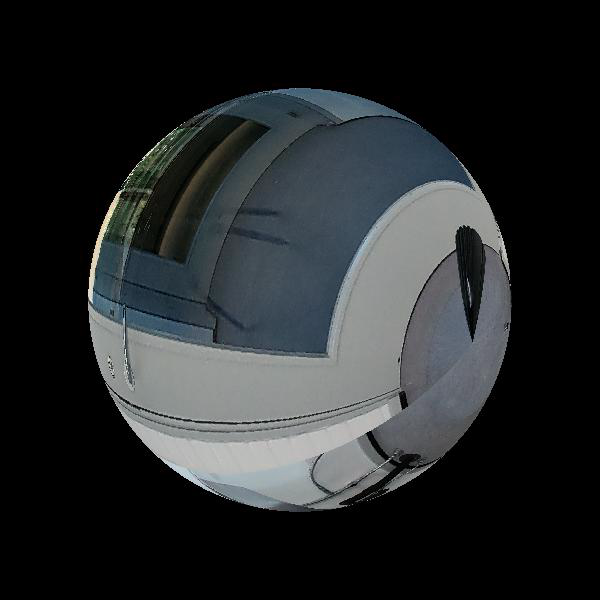

-1

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)
cv2.waitKey(0) #is required so that the image doesn’t close immediately. It will Wait for a key press before closing the image.

## flip

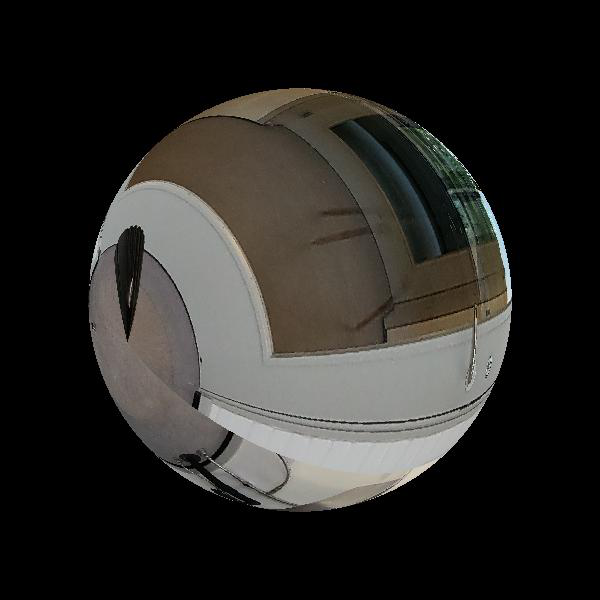

In [ ]:
flipnsave(thisfile, PATHtoIMG+thisfile, PATHout, extension_out = ".jpg",sizeout= 600)

In [ ]:
import math
import math, random
import os
from PIL import Image
from imageio import imread
from imageio import imwrite

def specific_projections(thisfile, PATHtoIMG, PATHout, lists_rotations, extension_out = ".jpg",sizeout= 300, tot_num_deformations = 20):

  """
  list_rotations = list of lists, each sublist is : [xy,xz,yz]
  """
  l = len(lists_rotations)# number of given lists of rotations
  if l <= tot_num_deformations: 
    num_deformations = tot_num_deformations -len(lists_rotations)
    
  # read input
  imageInput = Image.open(PATHtoIMG)
  filename = os.path.dirname(PATHtoIMG)
  all_deformations = []
  imgxOutput = sizeout; imgyOutput = sizeout
  
  for i in range(l):
    pi2 = math.pi * 2
    # 3D Sphere Rotation Angles from the given list of lists
    xy = lists_rotations[i][0]
    xz = lists_rotations[i][1]
    yz = lists_rotations[i][2]
    
    sxy = math.sin(xy); cxy = math.cos(xy)
    sxz = math.sin(xz); cxz = math.cos(xz)
    syz = math.sin(yz); cyz = math.cos(yz)
    (imgxInput, imgyInput) = imageInput.size
    pixelsInput = imageInput.load()
    imageOutput = Image.new("RGB", (imgxOutput, imgyOutput))
    pixelsOutput = imageOutput.load()
    # define a sphere behind the screen
    xc = (imgxOutput - 1.0) / 4 #THIS WAS 2 
    yc = (imgyOutput - 1.0) / 4 #THIS WAS 2 
    zc = min((imgxOutput - 1.0), (imgyOutput - 1.0)) / 4#THIS WAS 2 
    r = min((imgxOutput - 1.0), (imgyOutput - 1.0)) / 4#THIS WAS 2 
    # define eye point
    xo = (imgxOutput - 1.0) / 2
    yo = (imgyOutput - 1.0) / 2
    zo = -min((imgxOutput - 1.0), (imgyOutput - 1.0))
    xoc = xo - xc
    yoc = yo - yc
    zoc = zo - zc
    doc2 = xoc * xoc + yoc * yoc + zoc * zoc
    for yi in range(imgyOutput):
        for xi in range(imgxOutput):
            xio = xi - xo
            yio = yi - yo
            zio = 0.0 - zo
            dio = math.sqrt(xio * xio + yio * yio + zio * zio)
            xl = xio / dio
            yl = yio / dio
            zl = zio / dio
            dot = xl * xoc + yl * yoc + zl * zoc
            val = dot * dot - doc2 + r * r
            if val >= 0: # if there is line-sphere intersection
                if val == 0: # 1 intersection point
                    d = -dot
                else: # 2 intersection points => choose the closest
                    d = min(-dot + math.sqrt(val), -dot - math.sqrt(val))
                    xd = xo + xl * d
                    yd = yo + yl * d
                    zd = zo + zl * d
                    x = (xd - xc) / r
                    y = (yd - yc) / r
                    z = (zd - zc) / r
                    x0=x*cxy-y*sxy;y=x*sxy+y*cxy;x=x0 # xy-plane rotation
                    x0=x*cxz-z*sxz;z=x*sxz+z*cxz;x=x0 # xz-plane rotation 
                    y0=y*cyz-z*syz;z=y*syz+z*cyz;y=y0 # yz-plane rotation
                    lng = (math.atan2(y, x) + pi2) % pi2
                    lat = math.acos(z)
                    ix = int((imgxInput - 1) * lng / pi2 + 0.5)
                    iy = int((imgyInput - 1) * lat / math.pi + 0.5)
                    try:
                        pixelsOutput[xi, yi] = pixelsInput[ix, iy]
                    except:
                        pass
    #imageOutput.save("profile_projected.png", "PNG")
    #show image
    new_name = str(thisfile[0:-4])+"-def_%s"%i+"-size_%s" %sizeout+extension_out
    savepath_imageOutput = PATHout+'/'+ new_name
    #savepath_imageOutput = str(filename[0:-4])+"deformed_%s"%i+ extension_out
    
    print (savepath_imageOutput)
    #print (type(imageOutput))
    imageOutput.save(savepath_imageOutput)
    all_deformations.append(imageOutput)
    
  
  for i in range(num_deformations):
    pi2 = math.pi * 2
    # 3D Sphere Rotation Angles (arbitrary)
    xy = -pi2 * random.random()
    xz = -pi2 * random.random()
    yz = -pi2 * random.random()

    sxy = math.sin(xy); cxy = math.cos(xy)
    sxz = math.sin(xz); cxz = math.cos(xz)
    syz = math.sin(yz); cyz = math.cos(yz)
    (imgxInput, imgyInput) = imageInput.size
    pixelsInput = imageInput.load()
    imageOutput = Image.new("RGB", (imgxOutput, imgyOutput))
    pixelsOutput = imageOutput.load()
    # define a sphere behind the screen
    xc = (imgxOutput - 1.0) / 4 #THIS WAS 2 
    yc = (imgyOutput - 1.0) / 4 #THIS WAS 2 
    zc = min((imgxOutput - 1.0), (imgyOutput - 1.0)) / 4#THIS WAS 2 
    r = min((imgxOutput - 1.0), (imgyOutput - 1.0)) / 4#THIS WAS 2 
    # define eye point
    xo = (imgxOutput - 1.0) / 2
    yo = (imgyOutput - 1.0) / 2
    zo = -min((imgxOutput - 1.0), (imgyOutput - 1.0))
    xoc = xo - xc
    yoc = yo - yc
    zoc = zo - zc
    doc2 = xoc * xoc + yoc * yoc + zoc * zoc
    for yi in range(imgyOutput):
        for xi in range(imgxOutput):
            xio = xi - xo
            yio = yi - yo
            zio = 0.0 - zo
            dio = math.sqrt(xio * xio + yio * yio + zio * zio)
            xl = xio / dio
            yl = yio / dio
            zl = zio / dio
            dot = xl * xoc + yl * yoc + zl * zoc
            val = dot * dot - doc2 + r * r
            if val >= 0: # if there is line-sphere intersection
                if val == 0: # 1 intersection point
                    d = -dot
                else: # 2 intersection points => choose the closest
                    d = min(-dot + math.sqrt(val), -dot - math.sqrt(val))
                    xd = xo + xl * d
                    yd = yo + yl * d
                    zd = zo + zl * d
                    x = (xd - xc) / r
                    y = (yd - yc) / r
                    z = (zd - zc) / r
                    x0=x*cxy-y*sxy;y=x*sxy+y*cxy;x=x0 # xy-plane rotation
                    x0=x*cxz-z*sxz;z=x*sxz+z*cxz;x=x0 # xz-plane rotation 
                    y0=y*cyz-z*syz;z=y*syz+z*cyz;y=y0 # yz-plane rotation
                    lng = (math.atan2(y, x) + pi2) % pi2
                    lat = math.acos(z)
                    ix = int((imgxInput - 1) * lng / pi2 + 0.5)
                    iy = int((imgyInput - 1) * lat / math.pi + 0.5)
                    try:
                        pixelsOutput[xi, yi] = pixelsInput[ix, iy]
                    except:
                        pass
    #imageOutput.save("profile_projected.png", "PNG")
    #show image
    new_name = str(thisfile[0:-4])+"-def_%s"%i+"-size_%s" %sizeout+extension_out
    savepath_imageOutput = PATHout+'/'+ new_name
    #savepath_imageOutput = str(filename[0:-4])+"deformed_%s"%i+ extension_out

    print (savepath_imageOutput)
    #print (type(imageOutput))
    imageOutput.save(savepath_imageOutput)
    all_deformations.append(imageOutput)
    
  return all_deformations